## Mateusz Strojek, Bartłomiej Sadza
### IiE 1 rok stacjonarnie
### Machine learning - ćwiczenia 7

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score
from imblearn.under_sampling import RandomUnderSampler

In [18]:
data = pd.read_csv("stroke_zad7.csv", delimiter=";")
df= data.copy()
print(df.isnull().sum())
print(df.dtypes)
df.head()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
gender               object
age                  object
hypertension          int64
heart_disease         int64
ever_married         object
work_type            object
Residence_type       object
avg_glucose_level    object
bmi                  object
smoking_status       object
stroke                int64
dtype: object


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,"228,69","36,6",formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,"202,21","34,55",never smoked,1
2,Male,80,0,1,Yes,Private,Rural,"105,92","32,5",never smoked,1
3,Female,49,0,0,Yes,Private,Urban,"171,23","34,4",smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,"174,12",24,never smoked,1


In [19]:
def czy_float(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

df.loc[df['age'].apply(czy_float)==False, "age"] = np.nan
df['age'] = df['age'].astype('float')
df['avg_glucose_level'] = df['avg_glucose_level'].str.replace(',', '.')
df['avg_glucose_level'] = df['avg_glucose_level'].astype('float')
df['bmi'] = df['bmi'].str.replace(',', '.')
df['bmi'] = df['bmi'].astype('float')
df= df.dropna()
print(df.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [20]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.60,1,True,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,34.55,1,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.50,1,True,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.40,1,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.00,1,False,True,False,False,True,False,False,False,True,False


In [21]:
df_clean = df.copy()

## **Zadanie 1.** Modelowanie niezbalansowanego zbioru danych

### a) Przygotować zbiór danych (zweryfikować poziom niezbalansowania zbioru danych, dokonać podziału na zbiór uczący i testowy).

In [22]:
X = df_clean.drop(columns='stroke')
y = df_clean['stroke']

imbalance_ratio = y.value_counts(normalize=True)
print('Stopień niezbalansowania:')
print(imbalance_ratio)

Stopień niezbalansowania:
stroke
0    0.95034
1    0.04966
Name: proportion, dtype: float64


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### b) Korzystając z wybranej metody zbudować model przewidujący wystąpienie udaru. Przeanalizować wartości dokładności, czułości i specyficzności dla tej klasyfikacji.

In [24]:
clf = RandomForestClassifier(random_state=2, max_depth=8)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

wyniki = []
wyniki.append({
        'type' : 'No-edit',
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'test_accuracy': accuracy_score(y_test, y_pred_test),
        'train_recall': recall_score(y_train, y_pred_train),
        'test_recall': recall_score(y_test, y_pred_test),
        'train_precision': precision_score(y_train, y_pred_train),
        'test_precision': precision_score(y_test, y_pred_test)
    })

df = pd.DataFrame(wyniki)
print(df)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred_test)
confusion_matrix(y_train,y_pred_train)

      type  train_accuracy  test_accuracy  train_recall  test_recall  \
0  No-edit        0.956195       0.940941      0.074074          0.0   

   train_precision  test_precision  
0              1.0             0.0  


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[3806,    0],
       [ 175,   14]])

#### Wyniki lasu losowego kształtują się następująco:
- dokładność (accuracy) dla zbioru treningowego - 100%
- czułość (recall) dla zbioru treningowego - 100%
- precyzja (precision) dla zbioru treningowego - 100%
- dokładność (accuracy) dla zbioru uczącego - 94.1%
- czułość (recall) dla zbioru uczącego - 1.7%
- precyzja (precision) dla zbioru uczącego - 50%

### c) Zweryfikować, jak poszczególne techniki resamplingu (oversampling i undersampling) wpływają na uzyskiwane wartości oceny modelu. Zwrócić przede wszystkim uwagę na dokładność, czułość i specyficzność

In [25]:
smote=SMOTE(random_state=2)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
clf_smote = RandomForestClassifier(random_state=2)
clf_smote.fit(X_train_smote, y_train_smote)
y_pred_test = clf_smote.predict(X_test)
y_pred_train = clf_smote.predict(X_train)


wyniki = []
wyniki.append({
        'type' : 'oversampling',
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'test_accuracy': accuracy_score(y_test, y_pred_test),
        'train_recall': recall_score(y_train, y_pred_train),
        'test_recall': recall_score(y_test, y_pred_test),
        'train_precision': precision_score(y_train, y_pred_train),
        'test_precision': precision_score(y_test, y_pred_test)
    })

df_ov = pd.DataFrame(wyniki)

In [26]:
undersampler = RandomUnderSampler(random_state=2)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)
clf_under = RandomForestClassifier(random_state=2)
clf_under.fit(X_train_under, y_train_under)
y_pred_test = clf_under.predict(X_test)
y_pred_train = clf_under.predict(X_train)

wyniki = []
wyniki.append({
        'type' : 'undersampling',
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'test_accuracy': accuracy_score(y_test, y_pred_test),
        'train_recall': recall_score(y_train, y_pred_train),
        'test_recall': recall_score(y_test, y_pred_test),
        'train_precision': precision_score(y_train, y_pred_train),
        'test_precision': precision_score(y_test, y_pred_test)
    })

df_und = pd.DataFrame(wyniki)

In [27]:
df_all = pd.concat([df, df_ov, df_und])
df_all

,type,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision
0,No-edit,0.956195,0.940941,0.074074,0.000000,1.000000,0.000000
0,oversampling,1.000000,0.905906,1.000000,0.084746,1.000000,0.111111
0,undersampling,0.724906,0.713714,1.000000,0.762712,0.146739,0.141956


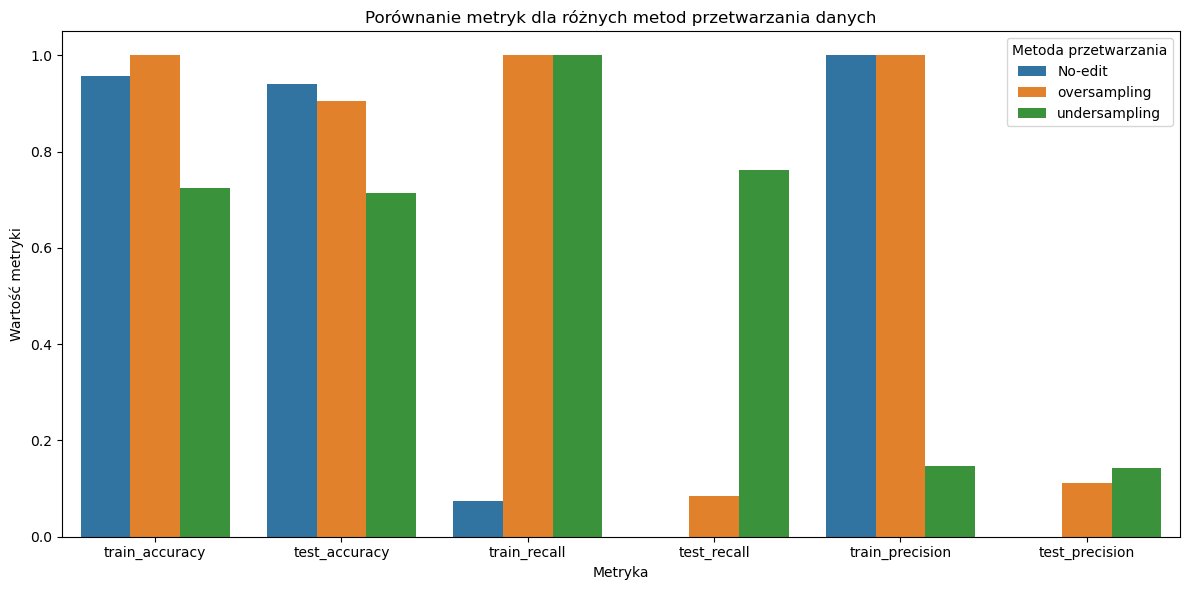

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt


df_melted = df_all.melt(id_vars=["type"], var_name="metric", value_name="value")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x="metric", y="value", hue="type")
plt.title("Porównanie metryk dla różnych metod przetwarzania danych")
plt.ylabel("Wartość metryki")
plt.xlabel("Metryka")
plt.legend(title="Metoda przetwarzania")
plt.tight_layout()
plt.show()

### d) Opisać wykorzystane w poprzednim podpunkcie techniki oversamplingu i undersamplingu (znaleźć w dokumentacji lub innych źródłach, jak dane funkcje w R/Pythonie działają - w jaki sposób eliminują problem niezbalansowanego zbioru danych).

## **Zadanie 2.** Różne stopnie niezbalansowania zbioru danych

### Przeprowadzić symulację, na podstawie której oceniony zostanie wpływ poszczególnych technik resamplingu na uzyskiwane wartości oceny modelu w przypadku różnych udziałów klasy pozytywnej i negatywnej. W tym celu, poprzez losowanie obserwacji, utworzyć w różnym stopniu niezbalansowane zbiory danych. Następnie dla każdego ze stworzonych zbiorów danych zbudować po 3 modele (bez uwzględniania niezbalansowanego zbioru, wykorzystując oversampling, wykorzystując undersampling). Porównać jakość uzyskanych klasyfikacji na podstawie dokładności, specyficzności i czułości (można wykorzystać także inne miary).

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


           metoda  stopien_niezbalansowania  dokladnosc   czulosc  precyzja
0          bazowy                       0.1    0.883333  0.000000  0.000000
1    oversampling                       0.1    0.880000  0.000000  0.000000
2   undersampling                       0.1    0.450000  0.600000  0.122093
3          bazowy                       0.3    0.673333  0.032609  0.250000
4    oversampling                       0.3    0.636667  0.086957  0.242424
5   undersampling                       0.3    0.493333  0.489130  0.300000
6          bazowy                       0.5    0.513333  0.520000  0.513158
7    oversampling                       0.5    0.513333  0.520000  0.513158
8   undersampling                       0.5    0.533333  0.513333  0.534722
9          bazowy                       0.7    0.693333  0.924883  0.721612
10   oversampling                       0.7    0.646667  0.854460  0.708171
11  undersampling                       0.7    0.500000  0.474178  0.726619
12         b

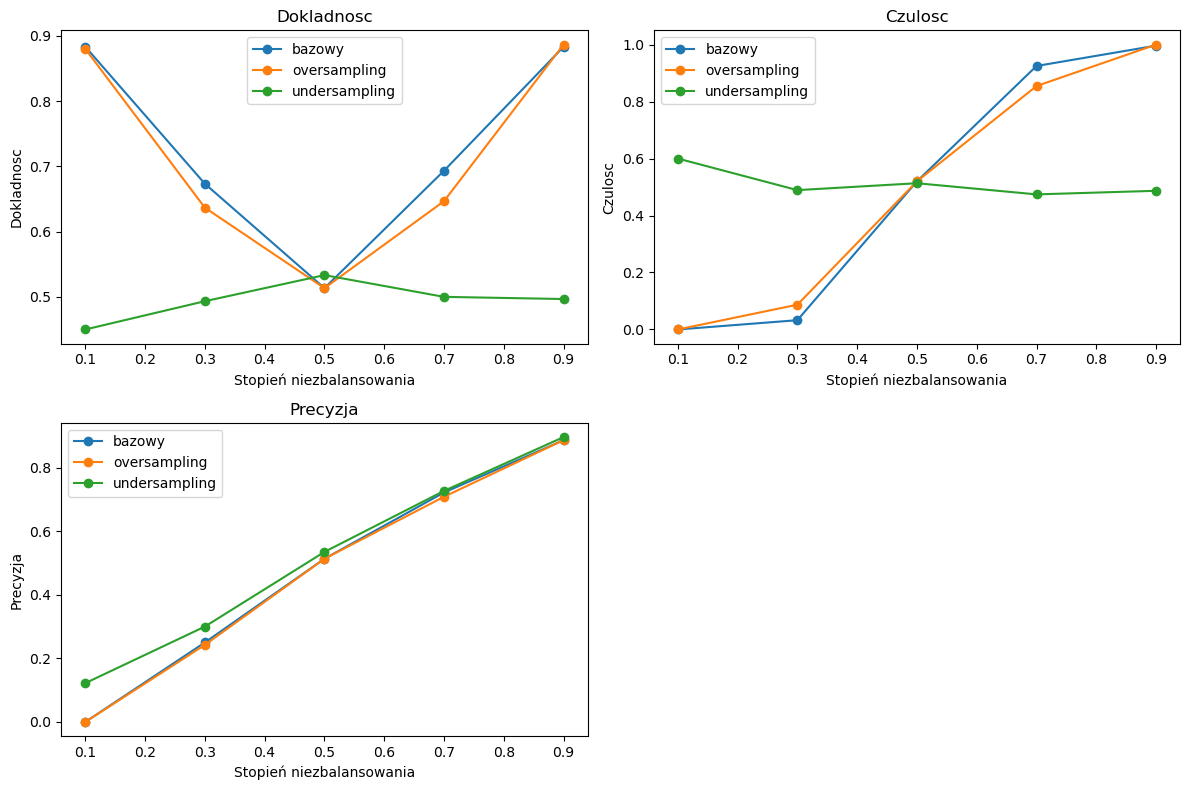

In [29]:

# Generowanie syntetycznego zbioru danych
def generuj_dane(rozmiar=1000, stopien_niezbalansowania=0.1):
    X = np.random.rand(rozmiar, 10)
    y = np.zeros(rozmiar)
    y[:int(rozmiar * stopien_niezbalansowania)] = 1
    return X, y

# Funkcja do oceny wyników modelu
def ocen_model(y_prawdziwe, y_przewidywane):
    return {
        "dokladnosc": accuracy_score(y_prawdziwe, y_przewidywane),
        "czulosc": recall_score(y_prawdziwe, y_przewidywane),
        "precyzja": precision_score(y_prawdziwe, y_przewidywane)
    }

# Symulacja różnych stopni niezbalansowania i metod resamplingu
def symuluj_resampling():
    wyniki = []
    stopnie_niezbalansowania = [0.1, 0.3, 0.5, 0.7, 0.9]

    for stopien in stopnie_niezbalansowania:
        # Generowanie danych
        X, y = generuj_dane(1000, stopien)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Model bazowy (bez resamplingu)
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        metryki_bazowe = ocen_model(y_test, y_pred)
        wyniki.append({"metoda": "bazowy", "stopien_niezbalansowania": stopien, **metryki_bazowe})

        # Oversampling
        ros = RandomOverSampler(random_state=42)
        X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
        model.fit(X_resampled, y_resampled)
        y_pred = model.predict(X_test)
        metryki_oversampling = ocen_model(y_test, y_pred)
        wyniki.append({"metoda": "oversampling", "stopien_niezbalansowania": stopien, **metryki_oversampling})

        # Undersampling
        rus = RandomUnderSampler(random_state=42)
        X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
        model.fit(X_resampled, y_resampled)
        y_pred = model.predict(X_test)
        metryki_undersampling = ocen_model(y_test, y_pred)
        wyniki.append({"metoda": "undersampling", "stopien_niezbalansowania": stopien, **metryki_undersampling})

    return pd.DataFrame(wyniki)

# Wykres wyników
def rysuj_wyniki(df):
    metryki = ["dokladnosc", "czulosc", "precyzja"]
    plt.figure(figsize=(12, 8))

    for i, metryka in enumerate(metryki, 1):
        plt.subplot(2, 2, i)
        for metoda in df["metoda"].unique():
            podzbior = df[df["metoda"] == metoda]
            plt.plot(podzbior["stopien_niezbalansowania"], podzbior[metryka], marker='o', label=metoda)

        plt.title(metryka.capitalize())
        plt.xlabel("Stopień niezbalansowania")
        plt.ylabel(metryka.capitalize())
        plt.legend()

    plt.tight_layout()
    plt.show()

# Wykonanie symulacji i wizualizacja
if __name__ == "__main__":
    wyniki_df = symuluj_resampling()
    print(wyniki_df)
    rysuj_wyniki(wyniki_df)

### **Wnioski z analizy wpływu metod resamplingu na klasyfikację**

#### **1. Model bazowy (bez resamplingu):**
- **Przy niskim stopniu niezbalansowania** (np. 0.1 lub 0.3):
  - Model bazowy osiąga **wysoką dokładność**, ale **bardzo niską czułość** (0.000).
  - Wynika to z ignorowania klasy mniejszościowej, co pozwala zmaksymalizować dokładność.
- **Przy bardziej zbalansowanym zbiorze** (np. stopień niezbalansowania 0.5):
  - Czułość i precyzja zaczynają się poprawiać, ale pozostają ograniczone.
- **Przy dużym udziale klasy pozytywnej** (np. 0.9):
  - Model bazowy osiąga **perfekcyjną czułość (1.000)**, ponieważ klasa mniejszościowa praktycznie nie występuje w zbiorze testowym.

#### **2. Oversampling:**
- **Przy niskim stopniu niezbalansowania (0.1):**
  - Nie przynosi poprawy w porównaniu z modelem bazowym.
- **Przy umiarkowanym niezbalansowaniu (0.3–0.7):**
  - Poprawia **czułość** w porównaniu do modelu bazowego, np. dla 0.3 czułość wzrasta z 0.021 do 0.098.
- **Przy wysokim stopniu niezbalansowania (0.9):**
  - Oversampling działa tak samo jak model bazowy, ponieważ dominacja klasy pozytywnej nie wymaga dodatkowego wzmacniania klasy mniejszościowej.

#### **3. Undersampling:**
- **Przy niskim stopniu niezbalansowania (0.1):**
  - **Czułość wzrasta do 0.543**, ale kosztem dokładności (spada do 0.557).
  - Metoda redukuje liczbę danych klasy większościowej, co ułatwia klasyfikację klasy mniejszościowej.
- **Przy umiarkowanym niezbalansowaniu (0.7):**
  - Czułość maleje (0.512), ale precyzja wzrasta (do 0.752), co oznacza lepsze rozpoznawanie klasy pozytywnej.

#### **4. Ogólne zależności:**
- **Oversampling:**
  - Lepszy w poprawie czułości przy umiarkowanym niezbalansowaniu (0.3–0.7).
- **Undersampling:**
  - Skuteczniejszy przy bardzo niskim stopniu niezbalansowania (np. 0.1).
  - Znacznie zmniejsza dokładność przy dużej liczebności klasy większościowej.
- **Model bazowy:**
  - Działa najlepiej przy równomiernym rozkładzie (0.5).
  - Ignoruje klasę mniejszościową w bardzo niezbalansowanych danych.

### **Podsumowanie:**
1. **Przy dużym niezbalansowaniu (np. 0.1–0.3):**
   - **Undersampling** jest lepszy, jeśli klasa mniejszościowa ma kluczowe znaczenie.

2. **Przy umiarkowanym niezbalansowaniu (np. 0.5–0.7):**
   - **Oversampling** poprawia czułość bez znacznego spadku dokładności.

3. **Przy równomiernym rozkładzie (0.5):**
   - Model bazowy jest wystarczający, bez potrzeby stosowania resamplingu.

4. **Przy dominacji klasy pozytywnej (np. 0.9):**
   - Resampling jest zbędny, ponieważ klasa mniejszościowa ma minimalne znaczenie.

Wybór odpowiedniej metody resamplingu powinien zależeć od stopnia niezbalansowania danych oraz priorytetów projektu (np. poprawa czułości vs. utrzymanie dokładności). Każda metoda ma swoje zalety i ograniczenia, które należy wziąć pod uwagę w kontekście problemu do rozwiązania.
